12.0/2020

In [1]:
library(tidyverse)
library(reshape2)
library(pheatmap)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
lib_csv = '../../psych_lib_info.csv'
lib_df = read.csv(lib_csv)
lib_df = mutate(lib_df, name_abbr = str_c(Chr, Position, sep='_'))
head(lib_df)

,X.1,name,X,Linked_SNP,Chr,Position,Index_SNP,Disease,DHS_tissue,eGene,⋯,dbscSNV.ada_score,dbscSNV.rf_score,RawScore,PHRED,num_disease,disease_interest,pass_thres_low,pass_thres,CADD_score_bool,name_abbr
,<int>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
1,1,chr1.111243375.all_alt.G,75004,rs12085135,chr1,111243375,rs12061304,panic disorder,t-helper_17_cell,,⋯,NA,NA,-0.197208,0.728,1,TRUE,TRUE,FALSE,NA,chr1_111243375
2,2,chr1.111243375.Ref.C,75004,rs12085135,chr1,111243375,rs12061304,panic disorder,t-helper_17_cell,,⋯,NA,NA,-0.197208,0.728,1,TRUE,TRUE,FALSE,NA,chr1_111243375
3,3,chr1.113938499.all_alt.C,1977,rs74395031,chr1,113938499,rs115870915,"type 2 diabetes,Obsessive Compulsive Disorder",astrocyte_of_the_spinal_cord,NA,⋯,NA,NA,0.309426,7.336,1,TRUE,TRUE,TRUE,NA,chr1_113938499
4,4,chr1.113938499.Ref.T,1977,rs74395031,chr1,113938499,rs115870915,"type 2 diabetes,Obsessive Compulsive Disorder",astrocyte_of_the_spinal_cord,NA,⋯,NA,NA,0.309426,7.336,1,TRUE,TRUE,TRUE,NA,chr1_113938499
5,5,chr1.11712109.all_alt.T,569,rs2103665,chr1,11712109,rs115049252,schizo,spleen,NA,⋯,NA,NA,0.193843,5.751,1,FALSE,TRUE,TRUE,NA,chr1_11712109
6,6,chr1.11712109.Ref.C,569,rs2103665,chr1,11712109,rs115049252,schizo,spleen,NA,⋯,NA,NA,0.193843,5.751,1,FALSE,TRUE,TRUE,NA,chr1_11712109


In [26]:
length(unique(lib_df$Linked_SNP))

[1] 2221

In [29]:
D0 = read.csv('D_mpraanalyze_barcode_allelic/mpraanalyze_H9D0_comp_filt.csv')

D2 = read.csv('D_mpraanalyze_barcode_allelic/mpraanalyze_H9D2_comp_filt.csv')

D4 = read.csv('D_mpraanalyze_barcode_allelic/mpraanalyze_H9D4_comp_filt.csv')

D10 =read.csv( 'D_mpraanalyze_barcode_allelic/mpraanalyze_H9D10_comp_filt.csv')

SL = read.csv( 'D_mpraanalyze_barcode_allelic/mpraanalyze_SL_comp_filt.csv')
SLC = read.csv( 'D_mpraanalyze_barcode_allelic/mpraanalyze_SLC_comp_filt.csv')

AST1 = read.csv( 'D_mpraanalyze_barcode_allelic/mpraanalyze_AST1_comp_filt.csv')
HEK293T = read.csv( 'D_mpraanalyze_barcode_allelic/mpraanalyze_HEK293_comp.csv') %>% filter(fdr<0.05)


In [30]:
D0$Disease

[1] anxiety                                                                                                                                                                                                                                                                  
  [2] anxiety                                                                                                                                                                                                                                                                  
  [3] schizophrenia                                                                                                                                                                                                                                                            
  [4] schizophrenia                                                                                                                                                                                                                                                            
  [5] schizophrenia                                                                                                                                                                                                                                                            
  [6] schizophrenia                                                                                                                                                                                                                                                            
  [7] schizophrenia                                                                                                                                                                                                                                                            
  [8] schizophrenia                                                                                                                                                                                                                                                            
  [9] schizophrenia                                                                                                                                                                                                                                                            
 [10] schizophrenia                                                                                                                                                                                                                                                            
 [11] attention deficit hyperactivity disorder,lung                                                                                                                                                                                                                            
 [12] attention deficit hyperactivity disorder,lung                                                                                                                                                                                                                            
 [13] parkinson,schizophrenia                                                                                                                                                                                                                                                  
 [14] parkinson,schizophrenia                                                                                                                                                                                                                                                  
 [15] atopic dermatitis,schizophrenia                                                                                                                                                             

In [31]:
length(unique(D0$rowname))
length(unique(D2$rowname))
length(unique(D4$rowname))
length(unique(D10$rowname))
length(unique(SL$rowname))
length(unique(SLC$rowname))
length(unique(AST1$rowname))
length(unique(HEK293T$rowname))


[1] 105

[1] 86

[1] 188

[1] 153

[1] 71

[1] 335

[1] 66

[1] 273

In [7]:
length(unique(D0$rowname, D2$rowname, D4$rowname,D10$rowname, AST1$rowname, SL$rowname, SLC$rowname))

[1] 191

In [9]:
D0 = read.csv('D_mpraanalyze_barcode_allelic/mpraanalyze_H9D0_comp.csv')
D0 = D0 %>%
    left_join(lib_df, by=c('rowname'='name_abbr'))
D2 = read.csv('D_mpraanalyze_barcode_allelic/mpraanalyze_H9D2_comp.csv')
D2 = D2 %>%
    left_join(lib_df, by=c('rowname'='name_abbr'))
D4 = read.csv('D_mpraanalyze_barcode_allelic/mpraanalyze_H9D4_comp.csv')
D4 = D4 %>%
    left_join(lib_df, by=c('rowname'='name_abbr'))
D10 =read.csv( 'D_mpraanalyze_barcode_allelic/mpraanalyze_H9D10_comp.csv')
D10 = D10 %>%
    left_join(lib_df, by=c('rowname'='name_abbr'))

Warning message:
“Column `rowname`/`name_abbr` joining factor and character vector, coercing into character vector”
Warning message:
“Column `rowname`/`name_abbr` joining factor and character vector, coercing into character vector”
Warning message:
“Column `rowname`/`name_abbr` joining factor and character vector, coercing into character vector”
Warning message:
“Column `rowname`/`name_abbr` joining factor and character vector, coercing into character vector”


In [10]:
colnames(D10)

[1] "X.1.x"              "X.x"                "rowname"           
  [4] "statistic"          "pval"               "fdr"               
  [7] "df.test"            "df.dna"             "df.rna.full"       
 [10] "df.rna.red"         "logFC"              "neglog10_p"        
 [13] "neglog10_p_x_logFC" "X.1.y"              "name"              
 [16] "X.y"                "Linked_SNP"         "Chr"               
 [19] "Position"           "Index_SNP"          "Disease"           
 [22] "DHS_tissue"         "eGene"              "eQTL_tissue"       
 [25] "Pval"               "source"             "RS"                
 [28] "pos"                "info"               "allele_type"       
 [31] "allele"             "seq150_new"         "seq21_new"         
 [34] "schizo"             "depress"            "bipolar"           
 [37] "anxiety"            "attent"             "personality"       
 [40] "panic"              "traum"              "autism"            
 [43] "ocd"                "Ref"                "Alt"               
 [46] "Type"               "Length"             "AnnoType"          
 [49] "Consequence"        "ConsScore"          "ConsDetail"        
 [52] "GC"                 "CpG"                "motifECount"       
 [55] "motifEName"         "motifEHIPos"        "motifEScoreChng"   
 [58] "oAA"                "nAA"                "GeneID"            
 [61] "FeatureID"          "GeneName"           "CCDS"              
 [64] "Intron"             "Exon"               "cDNApos"           
 [67] "relcDNApos"         "CDSpos"             "relCDSpos"         
 [70] "protPos"            "relProtPos"         "Domain"            
 [73] "Dst2Splice"         "Dst2SplType"        "minDistTSS"        
 [76] "minDistTSE"         "SIFTcat"            "SIFTval"           
 [79] "PolyPhenCat"        "PolyPhenVal"        "priPhCons"         
 [82] "mamPhCons"          "verPhCons"          "priPhyloP"         
 [85] "mamPhyloP"          "verPhyloP"          "bStatistic"        
 [88] "targetScan"         "mirSVR.Score"       "mirSVR.E"          
 [91] "mirSVR.Aln"         "cHmmTssA"           "cHmmTssAFlnk"      
 [94] "cHmmTxFlnk"         "cHmmTx"             "cHmmTxWk"          
 [97] "cHmmEnhG"           "cHmmEnh"            "cHmmZnfRpts"       
[100] "cHmmHet"            "cHmmTssBiv"         "cHmmBivFlnk"       
[103] "cHmmEnhBiv"         "cHmmReprPC"         "cHmmReprPCWk"      
[106] "cHmmQuies"          "GerpRS"             "GerpRSpval"        
[109] "GerpN"              "GerpS"              "TFBS"              
[112] "TFBSPeaks"          "TFBSPeaksMax"       "tOverlapMotifs"    
[115] "motifDist"          "Segway"             "EncH3K27Ac"        
[118] "EncH3K4Me1"         "EncH3K4Me3"         "EncExp"            
[121] "EncNucleo"          "EncOCC"             "EncOCCombPVal"     
[124] "EncOCDNasePVal"     "EncOCFairePVal"     "EncOCpolIIPVal"    
[127] "EncOCctcfPVal"      "EncOCmycPVal"       "EncOCDNaseSig"     
[130] "EncOCFaireSig"      "EncOCpolIISig"      "EncOCctcfSig"      
[133] "EncOCmycSig"        "Grantham"           "Dist2Mutation"     
[136] "Freq100bp"          "Rare100bp"          "Sngl100bp"         
[139] "Freq1000bp"         "Rare1000bp"         "Sngl1000bp"        
[142] "Freq10000bp"        "Rare10000bp"        "Sngl10000bp"       
[145] "dbscSNV.ada_score"  "dbscSNV.rf_score"   "RawScore"          
[148] "PHRED"              "num_disease"        "disease_interest"  
[151] "pass_thres_low"     "pass_thres"         "CADD_score_bool"

In [11]:
D0 = D0 %>%select(rowname, statistic, pval, fdr, logFC, Linked_SNP, Chr, Position, Index_SNP, Disease, eGene, eQTL_tissue, Pval, GeneName)
D0$day = 'D0'
D2 = D2 %>%select(rowname, statistic, pval, fdr, logFC, Linked_SNP, Chr, Position, Index_SNP, Disease, eGene, eQTL_tissue, Pval, GeneName)
D2$day = 'D2'
D4 = D4 %>%select(rowname, statistic, pval, fdr, logFC, Linked_SNP, Chr, Position, Index_SNP, Disease, eGene, eQTL_tissue, Pval, GeneName)
D4$day = 'D4'
D10 = D10 %>%select(rowname, statistic, pval, fdr, logFC, Linked_SNP, Chr, Position, Index_SNP, Disease, eGene, eQTL_tissue, Pval, GeneName)
D10$day = 'D10'


In [12]:
time_df = rbind(D0,D2,D4,D10)

In [13]:
tf_atac_time = read.csv('/Users/mguo123/Documents/pan_omics_psych/data/processed/fig1/atac/atac_time_heatmap_tfs.csv',row.names=1)
diff_tfs = rownames(tf_atac_time)

In [14]:
time_df_tf = time_df[time_df$GeneName %in%diff_tfs,]
dim(time_df_tf)

[1] 74 15

In [15]:
mpra_tfs = as.character(unique(time_df_tf$GeneName))
mpra_tfs

[1] "RARB"  "ZFHX3" "NFKB1" "SOX7"  "FOXP1" "GLIS3"

In [16]:
time_df_tf_sel =time_df_tf%>%
    select( GeneName, day, logFC)%>%
    group_by(GeneName,day)%>%
    summarise(logFC=mean(logFC))%>%
    spread(  day,    value=logFC)%>%
    column_to_rownames('GeneName')

In [23]:
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

,D0,D10,D2,D4
,<dbl>,<dbl>,<dbl>,<dbl>
FOXP1,-0.1315577,0.1734548,-0.15815436,0.25076976
GLIS3,-0.2468647,-0.4099841,-0.08427342,-0.05576806
NFKB1,-0.1428765,-0.2153320,-0.23884611,-0.63885236
RARB,1.0372673,1.3882471,0.91376703,0.44043336
SOX7,-0.1556634,-1.6554962,-1.11994616,-0.88944469
ZFHX3,0.6588878,0.6060439,0.64129644,0.37686098


pdf 
  2

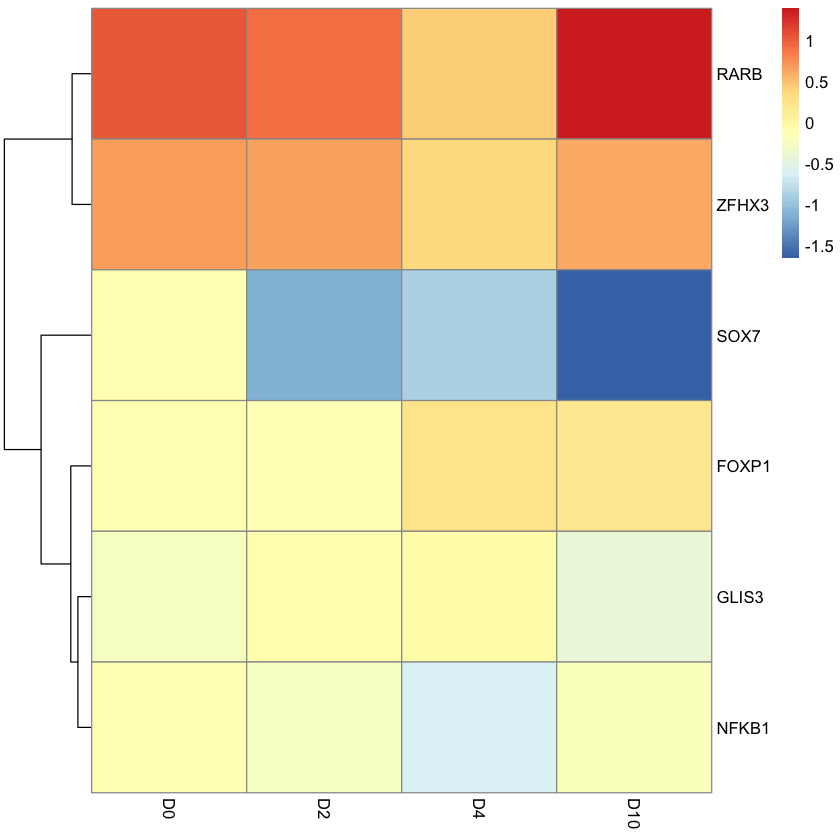

In [32]:
time_df_tf_sel
p = pheatmap(time_df_tf_sel[,c("D0","D2","D4","D10")], cluster_rows=T,cluster_cols=F)
save_pheatmap_pdf(p, 'D_mpraanalyze_barcode_allelic/tf_logFC.pdf')


In [18]:
time_df_tf_sel_p =time_df_tf%>%
    select( GeneName, day, pval)%>%
    group_by(GeneName,day)%>%
    summarise(pval=mean(pval))%>%
    spread(  day,    value=pval)%>%
    column_to_rownames('GeneName')

time_df_tf_sel_p

,D0,D10,D2,D4
,<dbl>,<dbl>,<dbl>,<dbl>
FOXP1,0.531573661,0.5375184658,0.51239069,0.33654713
GLIS3,0.043122332,0.0016440149,0.60843116,0.59209373
NFKB1,0.503270127,0.1144086374,0.48473997,0.36592544
RARB,0.026197884,0.0002102983,0.02380647,0.29035494
SOX7,0.745468479,0.0002928494,0.01652116,0.05241806
ZFHX3,0.004130868,0.0225599010,0.12236174,0.18314470


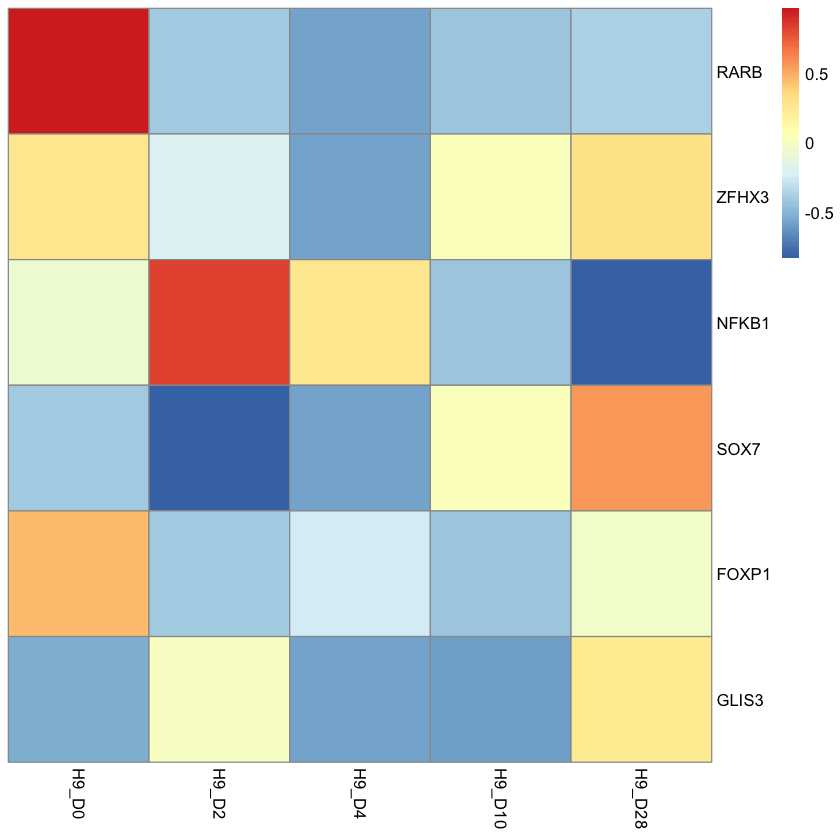

In [19]:
pheatmap(tf_atac_time[mpra_tfs,],cluster_rows=F,cluster_cols=F)

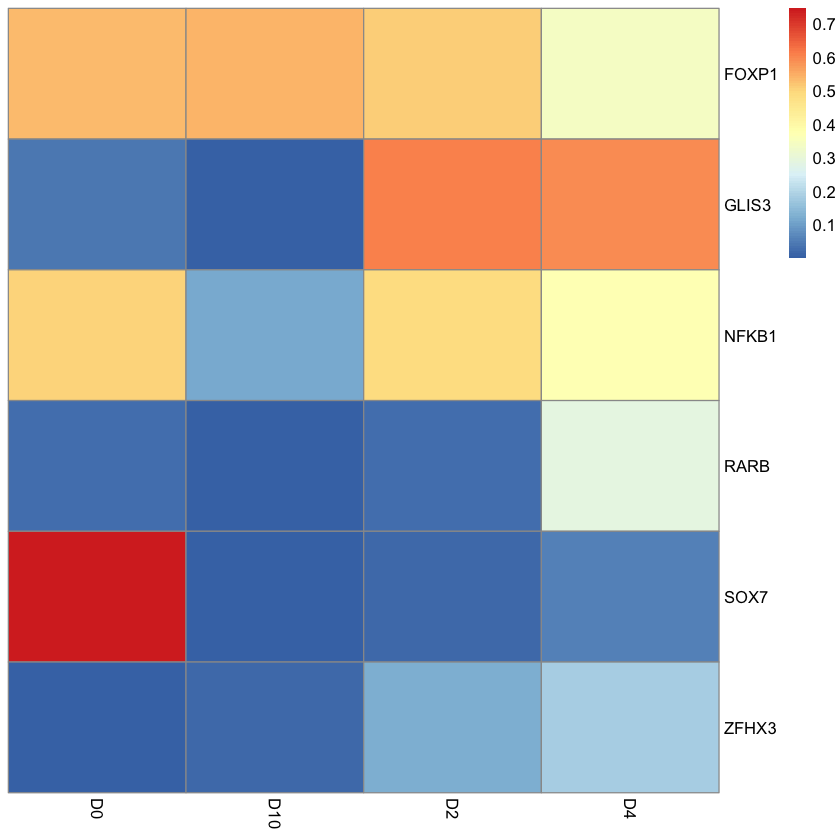

In [20]:
pheatmap(time_df_tf_sel_p,cluster_rows=F,cluster_cols=F)